# Processamento de Imagens em Python: scikit-image

![](python-logo.png)
![](logo.png)


# O que é uma imagem?

![](pdi.png)

### Como ler uma imagem

In [13]:
#importar a funcao imread da biblioteca skimage
from skimage.io import imread

In [14]:
#ler imagem
imagem = imread('lenna.jpg')

In [15]:
imagem.shape

(220, 220, 3)

### Como mostrar uma imagem

In [16]:
#importar a biblioteca matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

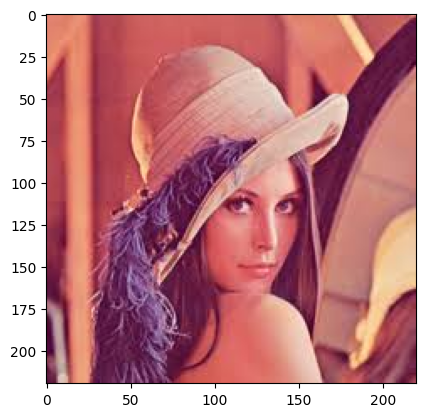

In [17]:
plt.imshow(imagem)

### Informações da Imagem

In [18]:
#dimensões
dim = imagem.shape

In [19]:
dim

(220, 220, 3)

### Trabalhando com Imagens Coloridas (RGB)
![](rgb.png)![image.png]
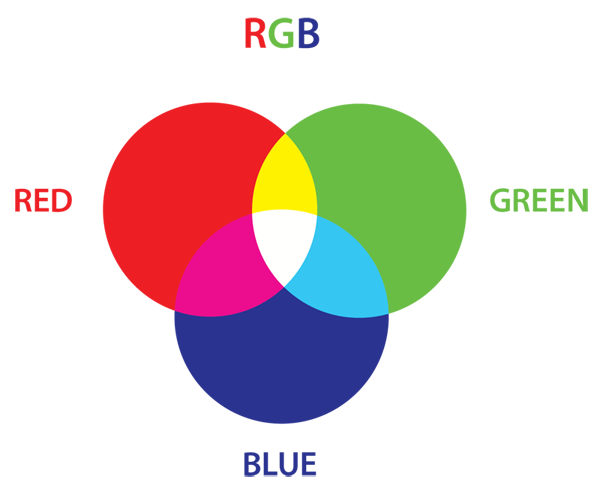

In [20]:
red = imagem[:,:,0]
green = imagem[:,:,1]
blue = imagem[:,:,2]

In [21]:
blue.shape

(220, 220)

### Mostrar várias imagens

Text(0.5, 1.0, 'Canal Blue do Sistema de Cores RGB')

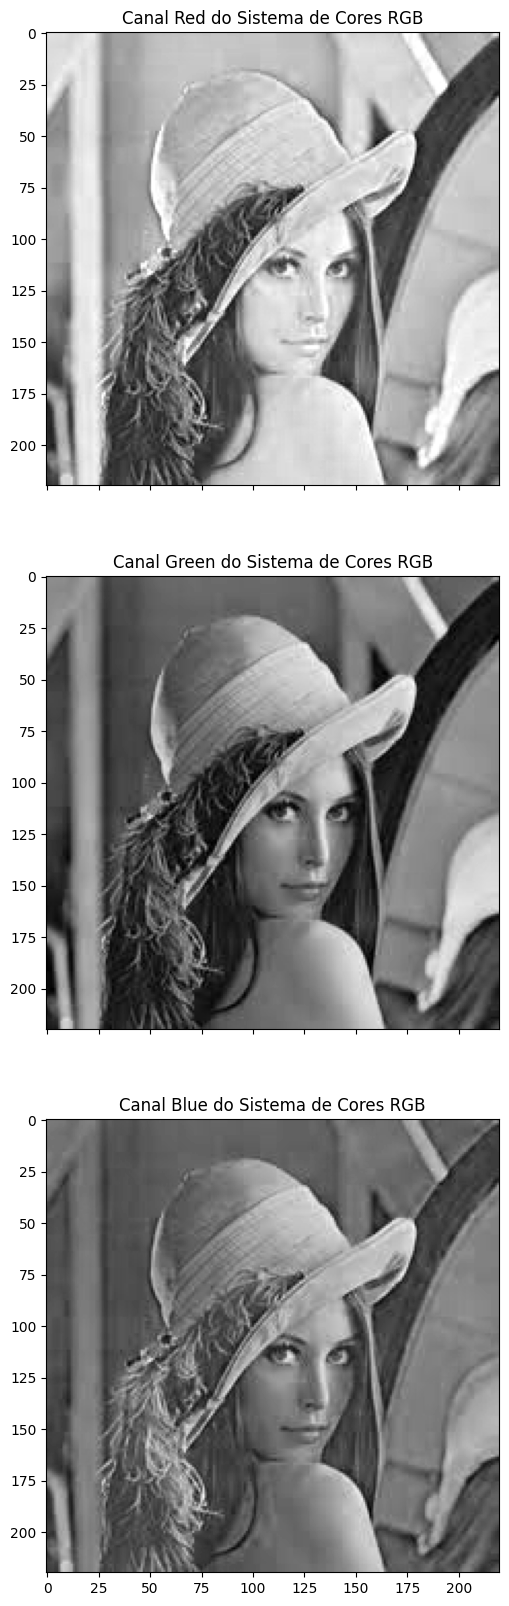

In [22]:
fig, ax = plt.subplots(3,1,figsize=(20, 20),sharex=True)
ax[0].imshow(red,cmap = 'gray')
ax[0].set_title('Canal Red do Sistema de Cores RGB')
ax[1].imshow(green,cmap = 'gray')
ax[1].set_title('Canal Green do Sistema de Cores RGB')
ax[2].imshow(blue,cmap = 'gray')
ax[2].set_title('Canal Blue do Sistema de Cores RGB')

### Níveis de cinza

$Y = 0.2125 R + 0.7154 G + 0.0721 B$

In [23]:
from skimage.color import rgb2gray

In [24]:
cinza = rgb2gray(imagem)

Text(0.5, 1.0, 'Imagens em Níveis de Cinza')

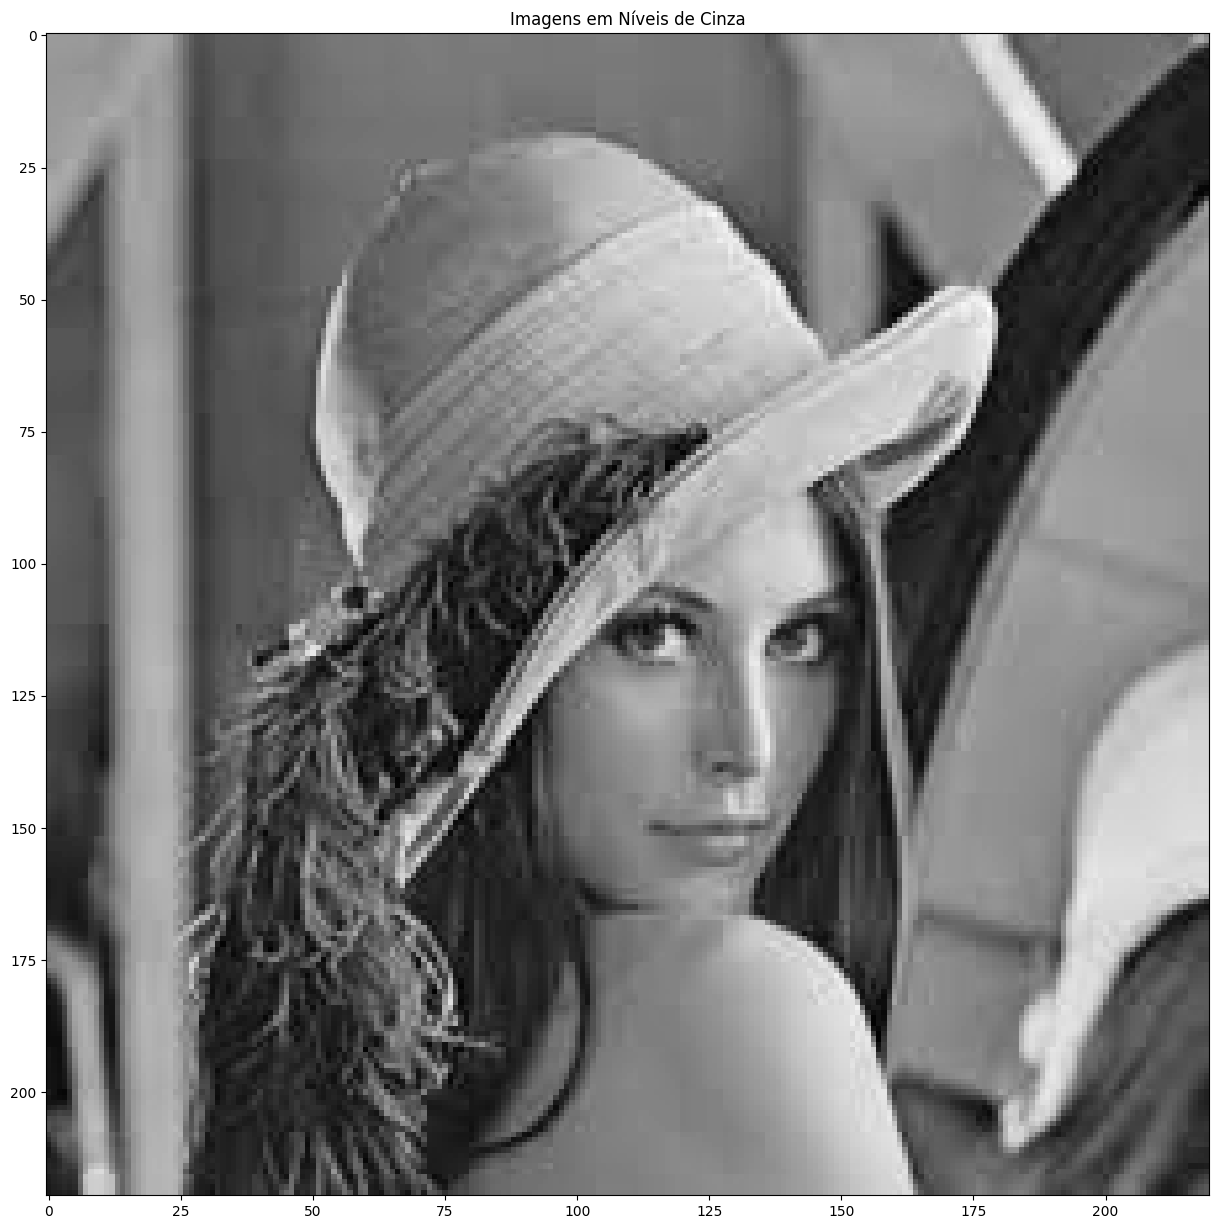

In [25]:
plt.figure(figsize=(15,30))
plt.imshow(cinza,cmap='gray')
plt.title('Imagens em Níveis de Cinza')

### Salvar resultado

In [26]:
#importar a funcao imsave da biblioteca skimage
from skimage.io import imsave

In [27]:
imsave('aula_visao.png',cinza)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


## Atividade

- Leia uma imagem
- Crie variáveis para armazenar cada componente do RGB
- Salve cada imagem em disco

### Remoção de Ruídos

In [28]:
#importar função com filtro da media
from skimage.restoration import denoise_nl_means

In [29]:
cinza_filter = denoise_nl_means(cinza,100)

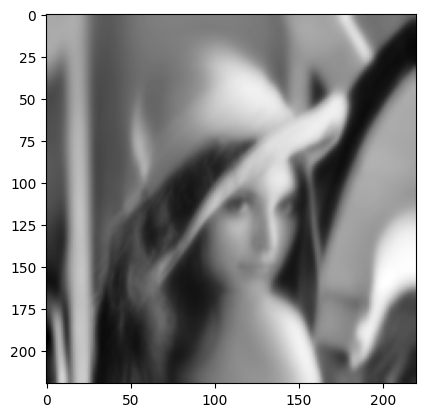

In [30]:
plt.imshow(cinza_filter,cmap = 'gray')

# Atividade: 

- Aplique o filtro da mediana em uma imagem de sua escolha com o tamanho de janela variando entre 3 e 13
- Plot os resultados e compare com a imagem original
- Analise os resultados obtidos

In [41]:
imagem = imread('lenna.jpg')

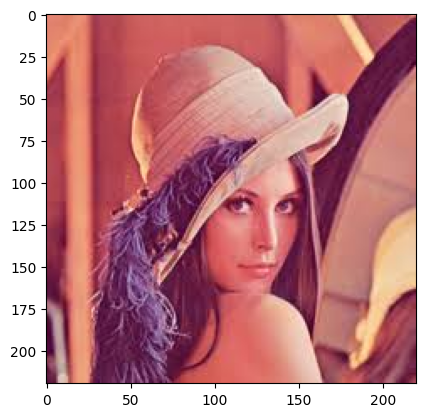

In [43]:
plt.imshow(imagem)

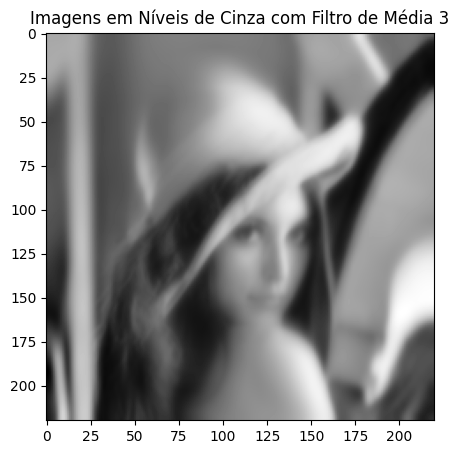

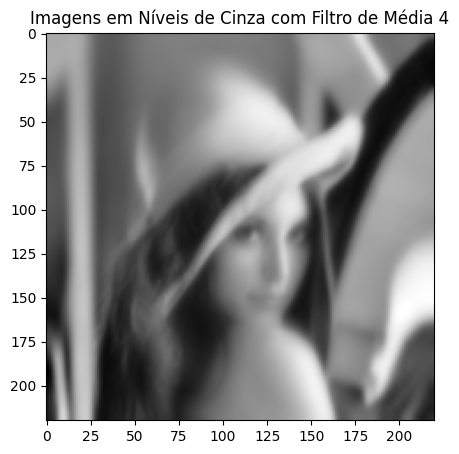

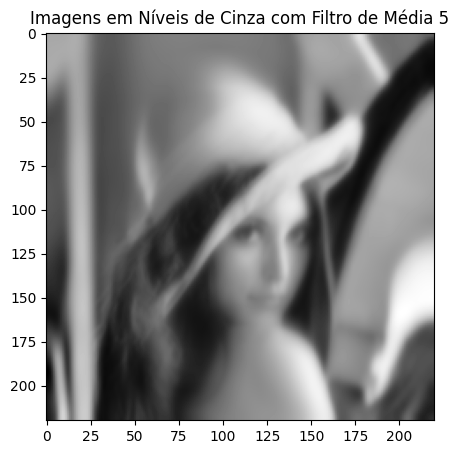

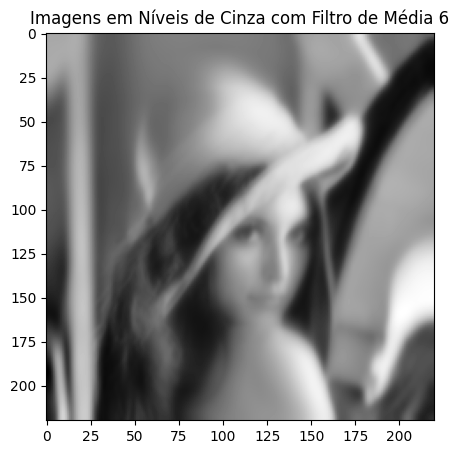

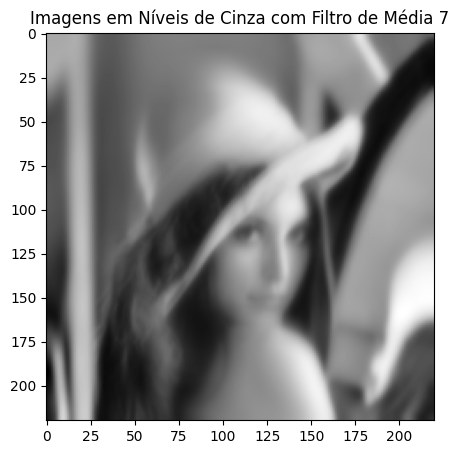

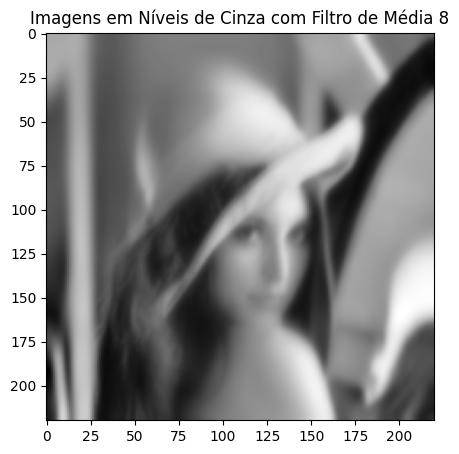

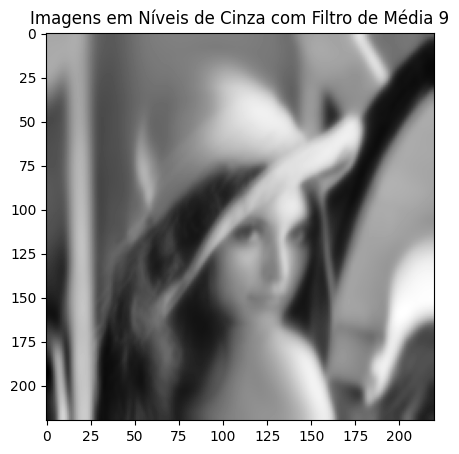

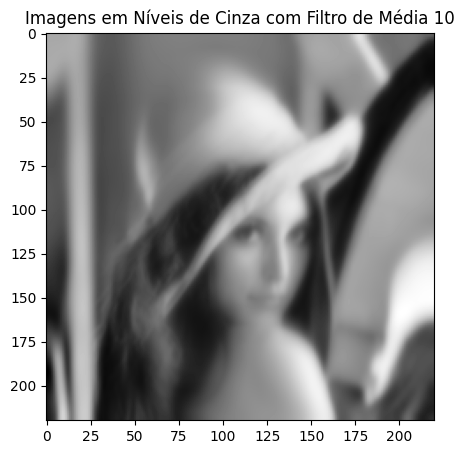

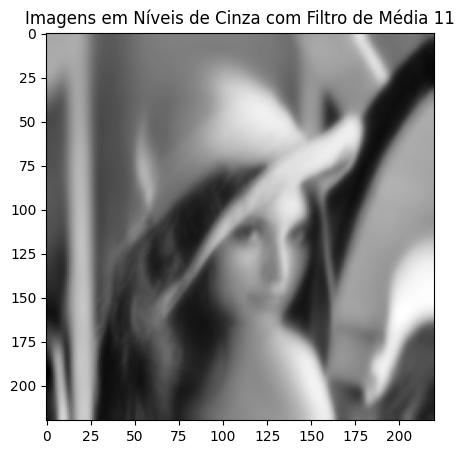

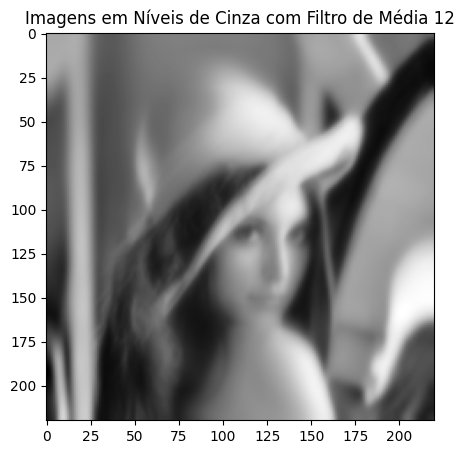

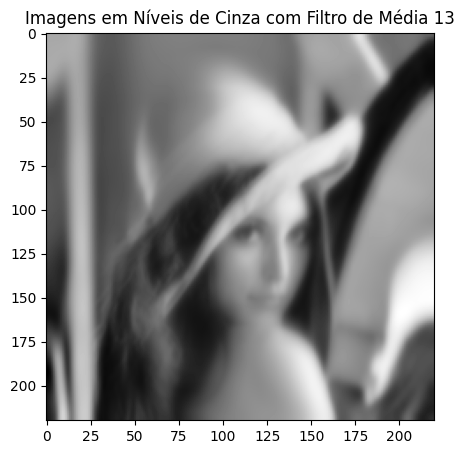

In [46]:
for i in range(3,14):
  imagem = denoise_nl_means(cinza,i)
  plt.figure(figsize=(5,10))
  plt.imshow(cinza_filter,cmap='gray')
  plt.title('Imagens em Níveis de Cinza com Filtro de Média {}'.format(i))
  plt.show()


### Percorendo uma imagem

In [32]:
linhas,colunas,dimensao = imagem.shape #pegar dimensoes da imagem

In [33]:
for l in range(linhas):
    for c in range(colunas):
        if (imagem[l,c,1] < 150):
            imagem[l,c,1] = 0

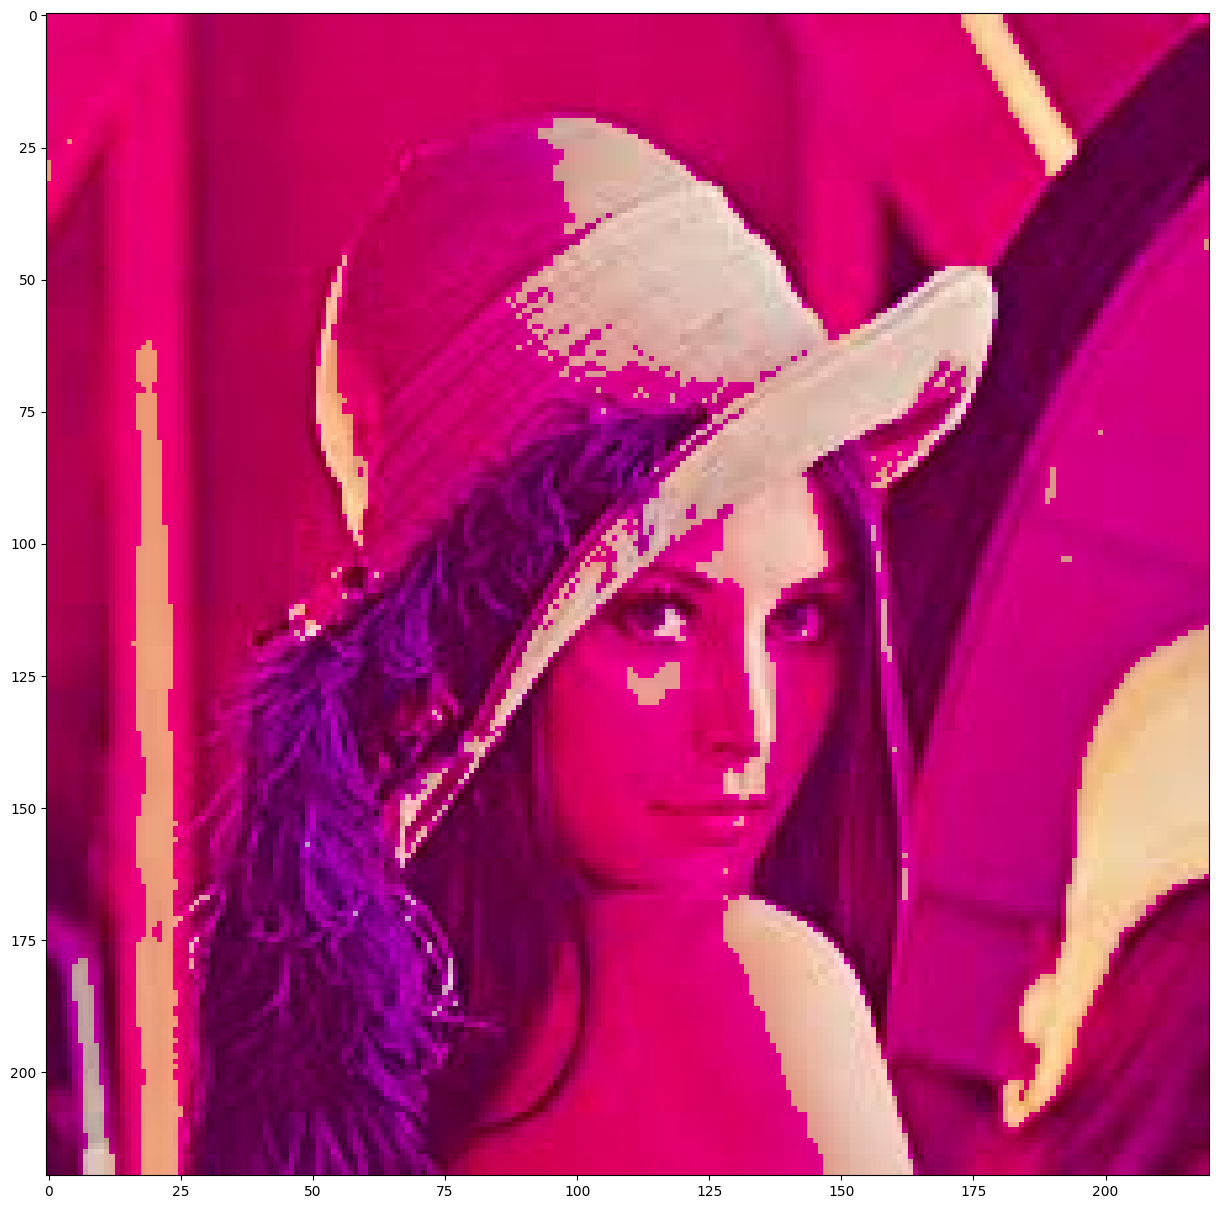

In [34]:
plt.figure(figsize=(15,30))
plt.imshow(imagem)

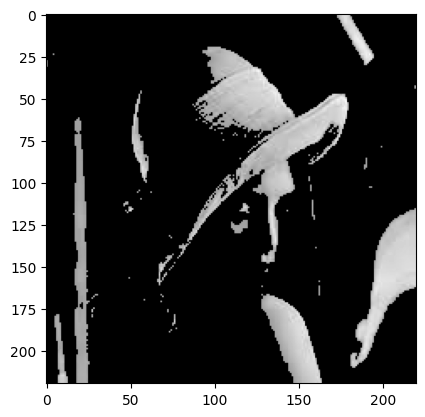

In [35]:
plt.imshow(imagem[:,:,1],cmap='gray')

In [47]:
plt.imshow(imagem[:,:,1],cmap='gray')

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

## Atividade 
- Percorra sua imagem e ache o pixel com maior valor em cada uma das componentes

In [59]:
for i in range(imagem.shape[0]):
  max_red = imagem[i,0]
  if (imagem[i,0] > max_red):
    max_red = imagem[i,0]
print(max_red)

IndentationError: unexpected indent (1343498952.py, line 3)

# Imagens Preto e Branco

In [ ]:
import numpy as np
from skimage.filters import threshold_otsu

In [ ]:
#método de Otsu
otsu = threshold_otsu(cinza)
preto_branco = (cinza < otsu)

In [ ]:
otsu

0.43519245404411766

In [ ]:
preto_branco

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

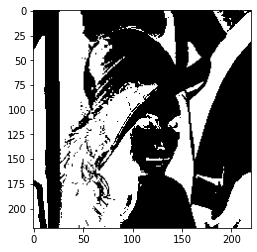

In [ ]:
plt.imshow(preto_branco,cmap = 'gray')

# Atividade
- Faça uma binarização na imagem variando o limiar entre 0 e 1 com passos de 0.2
- Plot os resultados

### Encontrando Bordas

In [ ]:
from skimage.filters import sobel,roberts,prewitt,scharr

In [ ]:
contorno = sobel(preto_branco)

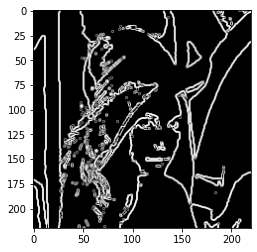

In [ ]:
plt.imshow(contorno,cmap = 'gray')

## Atividade
- Transforme uma imagem para preto e branco
- Utilize outros métodos que não seja o de Sobel para encontrar as bordas. Ex: scharr, prewitt e roberts
- Faça um plot com todos os métodos que você utilizou

In [ ]:
plt.imshow(binaria,cmap = 'gray')

### Recortes em Imagens

In [ ]:
recorte_imagem = imagem[110:120,100:150,:]

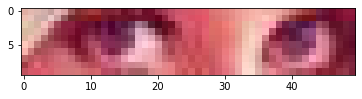

In [ ]:
plt.imshow(recorte_imagem)

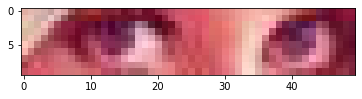

In [ ]:
plt.imshow(recorte_imagem,cmap='gray')

In [ ]:
recorte_imagem

array([], shape=(120, 0, 3), dtype=uint8)

### Desenhar formas geométricas

In [ ]:
from skimage.draw import rectangle,rectangle_perimeter

In [ ]:
start = (110, 100)
extent = (10,50)
rr, cc = rectangle_perimeter(start, extent=extent, shape=imagem.shape)
imagem[rr, cc,:] = [255,0,0]

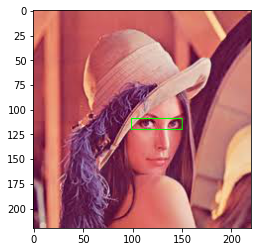

In [ ]:
plt.imshow(imagem)

In [ ]:
rr

array([109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109])

In [ ]:
cc

array([ 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137,
       136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124,
       123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111,
       110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99])